# Time Series Classification Algorithms - (10) Ensembles

<div style="border: 1px solid #007acc; background-color: #e6f4ff; padding: 10px; border-radius: 5px; color: black;">
  <strong>📘 Info:</strong> I do not claim ownership of the content in this notebook. It is based on official <a href="https://www.aeon-toolkit.org/en/latest/examples.html" target="_blank">aeon tutorials</a>, and parts of the code or text may have been copy-pasted or adapted directly from those or other sources for learning purposes.
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
import matplotlib.pyplot as plt

import pandas as pd

import seaborn as sns

from sklearn import metrics

import time

In [3]:
from aeon.datasets import load_classification
from aeon.utils.discovery import all_estimators

# all_estimators("classifier", tag_filter={"algorithm_type": "hybrid"})

In [4]:
from aeon.classification.hybrid import (
    HIVECOTEV1,
    HIVECOTEV2,
    RISTClassifier
)

In [5]:
DATASET_NAMES = [
    "MelbournePedestrian",
    "ArrowHead",
    "Colposcopy"
]

X_train_dict, y_train_dict = {}, {}
X_test_dict, y_test_dict = {}, {}

accuracy_dict, f1_score_dict, duration_dict = {}, {}, {}

for dataset_name in DATASET_NAMES: 
    X_train_dict[dataset_name], y_train_dict[dataset_name] = load_classification(
        dataset_name, split="train"
    )
    X_test_dict[dataset_name], y_test_dict[dataset_name] = load_classification(
        dataset_name, split="test"
    )

    X_train_dict[dataset_name] = X_train_dict[dataset_name].squeeze(1)
    X_test_dict[dataset_name] = X_test_dict[dataset_name].squeeze(1)

    accuracy_dict[dataset_name] = {}
    f1_score_dict[dataset_name] = {}
    duration_dict[dataset_name] = {}

```bibtex
@inbook{faouzi2024,
  author = {Johann Faouzi},
  title = {Time Series Classification: A Review of Algorithms and Implementations},
  year = {2024},
  month = {March},
  booktitle = {Advances in Time Series Analysis and Forecasting},
  publisher = {IntechOpen},
  isbn = {978-0-85466-053-7},
  doi = {10.5772/intechopen.1004810},
}
```

"Averaging the predictions of several independently trained models into a single prediction is a common approach to build a better final model by decreasing the variance of the predictions. In traditional ensemble methods, all the base classifiers belong to a given type of algorithms. For instance, in a random forest, all the base classifiers are decision trees. However, using a single type of algorithm limits the upsides and downsides of the final model to the ones of the base classifier. On the other hand, using several types of algorithms allows for learning a more diverse representation of the data. In particular, for time series classification, ensemble models that combine different types of algorithms (bag-of-words approaches, shapelet-based algorithms, convolutions, etc.) have been developed. They often are state-of-the-art in terms of predictive performance, at the cost of high computational complexity." \cite{faouzi2024}

## 1. Collective of Transformation-Based Ensembles (COTE)

```bibtex
@article{bagnall2015,
  author = {Anthony Bagnall and Jason Lines and Jon Hills and Aaron Bostrom},
  title = {Time-series Classification with COTE: The Collective of Transformation-based Ensembles},
  journal = {IEEE Transactions on Knowledge and Data Engineering},
  year = {2015},
  volume = {27},
  number = {9},
  pages = {2522--2535},
  doi = {10.1109/TKDE.2015.2416723}
}
```

Proposed by \cite{bagnall2015}.

"The Collective of Transformation-Based Ensembles (COTE) algorithm was the first proposed ensemble classifier. The most effective ensemble strategy was found to combine all the classifiers into a flat hierarchy and the corresponding model is often referred to as Flat-COTE. Flat-COTE combines 35 classifiers over four data representations: 11 classifiers based on whole series similarity measures, 8 classifiers based on shapelet-transform, 8 based on autocorrelation features, and 8 based on power spectrum." \cite{faouzi2024}

## 2. HIVE-COTE

```bibtex
@article{lines2018,
  author = {Jason Lines and Sarah Taylor and Anthony Bagnall},
  title = {Time Series Classification with HIVE-COTE: The Hierarchical Vote Collective of Transformation-Based Ensembles},
  journal = {ACM Transactions on Knowledge Discovery from Data},
  year = {2018},
  volume = {12},
  number = {5},
  pages = {52:1--52:35},
  doi = {10.1145/3185056}
}
```

Proposed by \cite{lines2018}.

The Hierarchical Vote Collective of Transformation-Based Ensembles (HIVE-COTE) algorithm is an extension of COTE with significant modifications, including a new type of spectral classifier called Random Interval Spectral Ensemble, two more classifiers (BOSS and Time Series Forest), and a hierarchical voting procedure, defined as a weighted average of the probabilities returned by each classifier, with the weights being proportional to the classification accuracy estimated through cross-validation.

HIVE-COTE are a family of algorithms that have been consistently the most accurate approaches for TSC with the UCR data. This first version of HIVE-COTE, subsequently called $\text{HIVE-COTE}_\alpha$ ($\text{HC}_\alpha$), is a heterogeneous ensemble containing five modules each from a different representation:
- The Elastic Ensemble from the distance-based representation;
- Time Series Forest from interval-based methods;
- BOSS from dictionary-based approaches;
- A version of the shapelet transform classifier, ST-HESCA, from shapelet-based techniques;
- And the spectral-based RISE.

The five modules are ensembled using the Cross-validation Accuracy Weighted Probabilistic Ensemble (CAWPE, known at the time as HESCA)..

CAWPE employs a tilted probability distribution using exponential weighting of probabilities estimated for each module found through cross-validation on the train data. The weighted probabilities from each module are summed and standardised to produce the HIVE-COTE probability prediction.

https://www.aeon-toolkit.org/en/latest/examples/classification/hybrid.html#The-Hierarchical-Vote-Collective-of-Transformation-Ensembles-(HIVE-COTE)

## 3. HIVE-COTE v1

```bibtex
@incollection{bagnall2020,
  author = {Anthony Bagnall and Matthew Flynn and James Large and Jason Lines and Michael Middlehurst},
  title = {On the Usage and Performance of the Hierarchical Vote Collective of Transformation-Based Ensembles Version 1.0 (HIVE-COTE v1.0)},
  booktitle = {Advanced Analytics and Learning on Temporal Data},
  editor = {Vincent Lemaire and Sébastien Malinowski and Anthony Bagnall and Thomas Guyet and Romain Tavenard and Georgiana Ifrim},
  series = {Lecture Notes in Computer Science},
  publisher = {Springer International Publishing},
  year = {2020},
  pages = {3--18},
  doi = {10.1007/978-3-030-65965-3_1}
}
```

Proposed by \cite{bagnall2020}.

```bibtex
@article{middlehurst2024,
  author = {Middlehurst, Matthew and Sch{\"a}fer, Patrick and Bagnall, Anthony},
  title = {Bake Off Redux: A Review and Experimental Evaluation of Recent Time Series Classification Algorithms},
  journal = {Data Mining and Knowledge Discovery},
  volume = {38},
  pages = {1958--2031},
  year = {2024},
  doi = {10.1007/s10618-024-01022-1},
  url = {https://doi.org/10.1007/s10618-024-01022-1}
}
```

"Whilst state-of-the-art in terms of accuracy, $\text{HC}_\alpha$ scales poorly. A range of improvements to make HIVE-COTE more usable were introduced in HIVE-COTE v1.0 (HC1). HC1 has four modules instead of the five used in $\text{HC}_\alpha$: it drops the computationally intensive EE algorithm without loss of accuracy. BOSS is replaced by the more configurable cBOSS. The improved randomised version of STC is included with a default limit on the search and the Rotation Forest classifier. TSF and RISE had usability improvements. HC1 is designed to be contractable, in that you can specify a maximum train time." \cite{middlehurst2024}

In [6]:
method = "HIVE-COTE v1"
print(method)

for dataset_name in DATASET_NAMES:
    start_time = time.time()
    hc1 = HIVECOTEV1()
    hc1.fit(X_train_dict[dataset_name], y_train_dict[dataset_name])
    hc1_preds = hc1.predict(X_test_dict[dataset_name])
    accuracy_dict[dataset_name][method] = metrics.accuracy_score(
        y_test_dict[dataset_name], hc1_preds
    )
    f1_score_dict[dataset_name][method] = metrics.f1_score(
        y_test_dict[dataset_name], hc1_preds,
        average="weighted"
    )

    elapsed_time = time.time() - start_time
    duration_dict[dataset_name][method] = elapsed_time
    print("-------------------------------------------")
    print(f"Dataset: {dataset_name}")
    print(f"Accuracy: {accuracy_dict[dataset_name][method]:.2f}")
    print(f"F1-Score: {f1_score_dict[dataset_name][method]:.2f}")
    print(f"Duration: {duration_dict[dataset_name][method]:.2f} seconds")

HIVE-COTE v1
-------------------------------------------
Dataset: MelbournePedestrian
Accuracy: 0.97
F1-Score: 0.97
Duration: 669.52 seconds
-------------------------------------------
Dataset: ArrowHead
Accuracy: 0.87
F1-Score: 0.87
Duration: 15.67 seconds
-------------------------------------------
Dataset: Colposcopy
Accuracy: 0.46
F1-Score: 0.35
Duration: 27.22 seconds


## 4. HIVE-COTE v2

```bibtex
@misc{middlehurst2021,
  author = {Michael Middlehurst and James Large and Matthew Flynn and Jason Lines and Aaron Bostrom and Anthony Bagnall},
  title = {{HIVE-COTE 2.0: A New Meta Ensemble for Time Series Classification}},
  year = {2021},
  url = {http://arxiv.org/abs/2104.07551},
  note = {Accessed: Aug 9, 2021}
}
```

Proposed by \cite{middlehurst2021}.

"In 2021, HIVE-COTE was again updated to further address scalability issues and reﬂect recent innovations to individual TSC representations and HIVE-COTE v2.0 (HC2) was proposed. In HC2, RISE, TSF and cBOSS are replaced, with only STC retained. TDE replaces cBOSS as the dictionary classiﬁer. DrCIF replaces both TSF and RISE for the interval and frequency representations. An ensemble of ROCKET classiﬁers called the Arsenal is introduced as a new convolutional based approach. Estimation of test accuracy via cross-validation is replaced by an adapted form of out-of-bag error, although the ﬁnal model is still built using all training data. Unlike previous versions, HC2 is capable of classifying multivariate time series." \cite{middlehurst2024}

In [7]:
method = "HIVE-COTE v2"
print(method)

for dataset_name in DATASET_NAMES:
    start_time = time.time()

    hc2 = HIVECOTEV2(time_limit_in_minutes=20)
    hc2.fit(X_train_dict[dataset_name], y_train_dict[dataset_name])
    hc2_preds = hc2.predict(X_test_dict[dataset_name])
    accuracy_dict[dataset_name][method] = metrics.accuracy_score(
        y_test_dict[dataset_name], hc2_preds
    )
    f1_score_dict[dataset_name][method] = metrics.f1_score(
        y_test_dict[dataset_name], hc2_preds,
        average="weighted"
    )

    elapsed_time = time.time() - start_time
    duration_dict[dataset_name][method] = elapsed_time
    print("-------------------------------------------")
    print(f"Dataset: {dataset_name}")
    print(f"Accuracy: {accuracy_dict[dataset_name][method]:.2f}")
    print(f"F1-Score: {f1_score_dict[dataset_name][method]:.2f}")
    print(f"Duration: {duration_dict[dataset_name][method]:.2f} seconds")

HIVE-COTE v2
-------------------------------------------
Dataset: MelbournePedestrian
Accuracy: 0.94
F1-Score: 0.94
Duration: 2163.35 seconds
-------------------------------------------
Dataset: ArrowHead
Accuracy: 0.89
F1-Score: 0.89
Duration: 516.66 seconds
-------------------------------------------
Dataset: Colposcopy
Accuracy: 0.42
F1-Score: 0.30
Duration: 505.48 seconds


## 5. Time Series Combination of Heterogeneous and Integrated Embedding Forest (TS-CHIEF)

```bibtex
@article{shifaz2020,
  author = {Abdullah Shifaz and Céline Pelletier and François Petitjean and Geoffrey I. Webb},
  title = {TS-CHIEF: A Scalable and Accurate Forest Algorithm for Time Series Classification},
  journal = {Data Mining and Knowledge Discovery},
  year = {2020},
  volume = {34},
  number = {3},
  pages = {742--775},
  doi = {10.1007/s10618-020-00678-6}
}
```

Proposed by \cite{shifaz2020}.

"The Time Series Combination of Heterogeneous and Integrated Embedding Forest (TS-CHIEF) algorithm is another ensemble model rivaling with HIVE-COTE in terms of predictive performance while having a substantially lower runtime. TS-CHIEF builds a random forest of decision trees whose splitting functions are time series specific and based on similarity measures, dictionary (bag-of-words) representations, and interval-based transformations." \cite{faouzi2024}

"The Time Series Combination of Heterogeneous and Integrated Embedding Forest (TS-CHIEF) is a homogeneous ensemble where hybrid features are embedded in tree nodes rather than modularised through separate classiﬁers. The TS-CHIEF comprises an ensemble of trees that embed distance, dictionary, and spectral base features. At each node, a number of splitting criteria from each of these representations are considered. These splits use randomly initialised parameters to help maintain diversity in the ensemble. The dictionary based splits are based on BOSS, distance splits based on EE and interval splits based on RISE. The goal of TS-CHIEF was to obtain the beneﬁts of multiple representations without the massive
processing requirement of the original HIVE-COTE." \cite{middlehurst2024}

## 6. Randomised Interval-Shapelet Transformation (RIST)

```bibtex
@inproceedings{middlehurst2023,
  author = {Michael Middlehurst and Anthony Bagnall},
  title = {Extracting Features from Random Subseries: A Hybrid Pipeline for Time Series Classification and Extrinsic Regression},
  booktitle = {International Workshop on Advanced Analytics and Learning on Temporal Data},
  pages = {113--126},
  year = {2023},
  month = {September},
  publisher = {Springer Nature Switzerland},
}
```

Proposed by \cite{middlehurst2023}.

"The Randomised Interval-Shapelet Transformation (RIST) pipeline is a simpler approach than the previously described hybrids. Rather than constructing an ensemble, RIST concatenates the output of multiple transformations to form a pipeline classifier. RIST uses the transformation portions from the interval based DrCIF and the shapelet based RDST algorithms. For both of these transformations, features are extracted from both the base series and multiple series representations. These representations are the first order differences, the periodogram of the series and the series autoregression coefficients. After concatenating the output, these features are then used to build an Extra Trees classifier. The aim of RIST is to provide a simple and relatively efficient hybrid algorithm which can be applied to both classification and extrinsic regression tasks." \cite{middlehurst2024}

In [8]:
method = "RIST"
print(method)

for dataset_name in DATASET_NAMES:
    start_time = time.time()

    rist = RISTClassifier()
    rist.fit(X_train_dict[dataset_name], y_train_dict[dataset_name])
    rist_preds = rist.predict(X_test_dict[dataset_name])
    accuracy_dict[dataset_name][method] = metrics.accuracy_score(
        y_test_dict[dataset_name], rist_preds
    )
    f1_score_dict[dataset_name][method] = metrics.f1_score(
        y_test_dict[dataset_name], rist_preds,
        average="weighted"
    )

    elapsed_time = time.time() - start_time
    duration_dict[dataset_name][method] = elapsed_time
    print("-------------------------------------------")
    print(f"Dataset: {dataset_name}")
    print(f"Accuracy: {accuracy_dict[dataset_name][method]:.2f}")
    print(f"F1-Score: {f1_score_dict[dataset_name][method]:.2f}")
    print(f"Duration: {duration_dict[dataset_name][method]:.2f} seconds")

RIST
-------------------------------------------
Dataset: MelbournePedestrian
Accuracy: 0.97
F1-Score: 0.97
Duration: 84.08 seconds
-------------------------------------------
Dataset: ArrowHead
Accuracy: 0.85
F1-Score: 0.85
Duration: 27.86 seconds
-------------------------------------------
Dataset: Colposcopy
Accuracy: 0.43
F1-Score: 0.30
Duration: 21.97 seconds


## 7. Comparison between the Classifiers

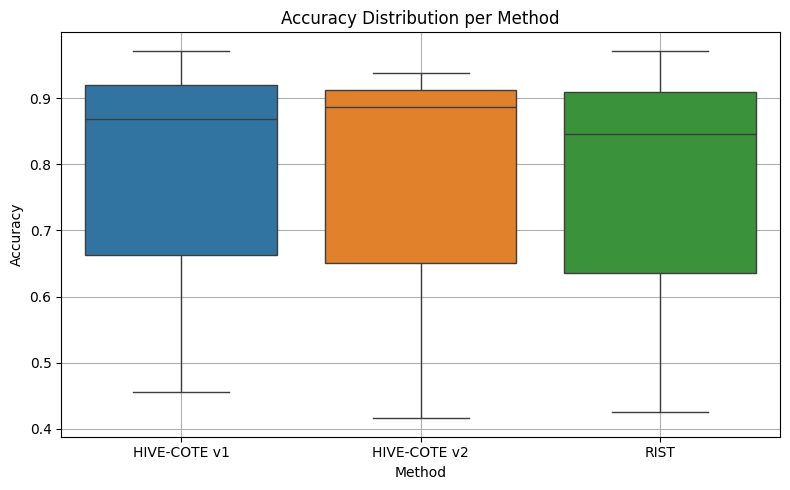

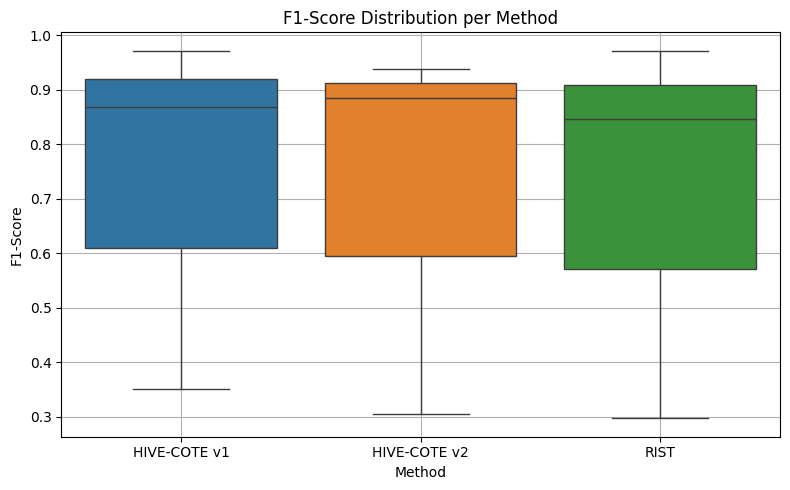

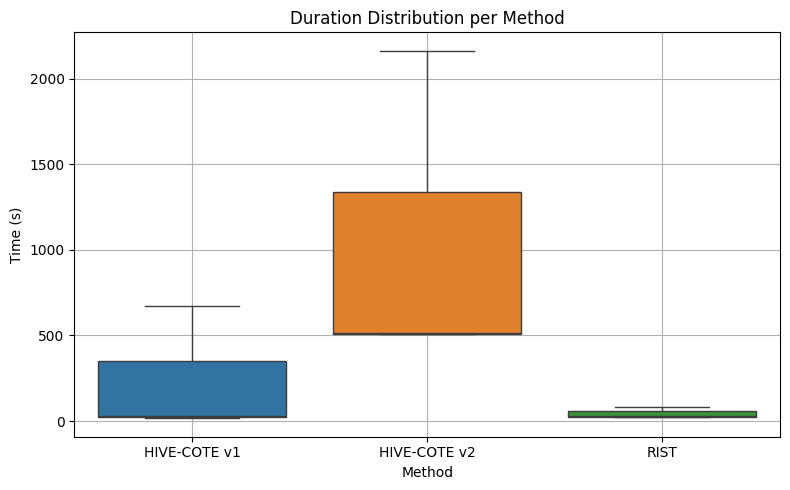

In [9]:
datasets = list(accuracy_dict.keys())
methods = list(next(iter(accuracy_dict.values())).keys())

def prepare_long_format(metric_dict, metric_name):
    records = []
    for ds in datasets:
        for method in methods:
            val = metric_dict[ds][method]
            if isinstance(val, (int, float)):
                records.append({
                    "Dataset": ds,
                    "Method": method,
                    "Metric": float(val),
                    "Type": metric_name
                })
    return pd.DataFrame(records)

df_accuracy = prepare_long_format(accuracy_dict, "Accuracy")
df_f1 = prepare_long_format(f1_score_dict, "F1-Score")
df_duration = prepare_long_format(duration_dict, "Duration (s)")

df_all = pd.concat([df_accuracy, df_f1, df_duration], ignore_index=True)

def plot_boxplot(df, title, ylabel):
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x="Method", y="Metric", hue="Method")
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel("Method")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_boxplot(df_accuracy, "Accuracy Distribution per Method", "Accuracy")
plot_boxplot(df_f1, "F1-Score Distribution per Method", "F1-Score")
plot_boxplot(df_duration, "Duration Distribution per Method", "Time (s)")